Visual

upload plot

    1. Line Plot : Monthly avg votes
    2. Scatter Plot : Likes vs Dislike in Comment
    3. Sub Plot (left and right)
        a. barh : Merchant All Total Booking
        b. Pie Chart : Completed vs Cancelled

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH_DATA = '../mydata/'
PATH_DATA2 = '../mydata/employee_data/'
PLOT_RES = 'plot/'

1. Line Plot : Monthly avg votes

In [3]:
df_votes = pd.read_csv(PATH_DATA2+'votes.csv', parse_dates = ['voteDate'])

/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [4]:
df_votes['month'] = df_votes['voteDate'].dt.strftime('%Y-%m')

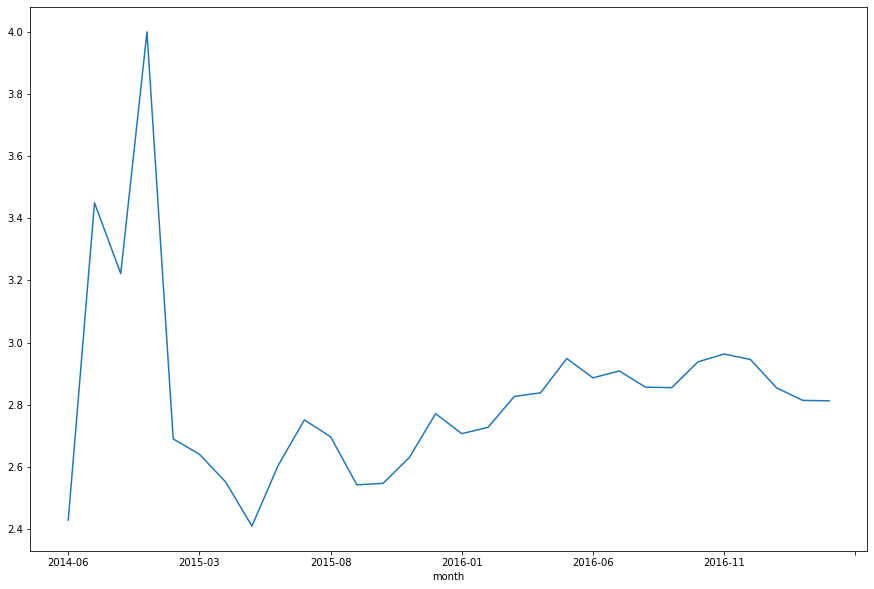

In [5]:
df_votes.groupby('month').vote.mean().plot(figsize = (15,10))

In [6]:
df_votes

,employee,companyAlias,voteDate,vote,month
0,31,56aec740f1ef260003e307d6,2016-02-01 01:00:00,4,2016-02
1,33,56aec740f1ef260003e307d6,2016-02-01 01:00:00,4,2016-02
2,79,56aec740f1ef260003e307d6,2016-02-01 01:00:00,4,2016-02
3,94,56aec740f1ef260003e307d6,2016-02-01 01:00:00,4,2016-02
4,16,56aec740f1ef260003e307d6,2016-02-01 01:00:00,2,2016-02
...,...,...,...,...,...
221227,17,573a0671b5ec330003add34a,2016-06-03 02:00:00,3,2016-06
221228,17,573a0671b5ec330003add34a,2016-06-07 02:00:00,4,2016-06
221229,17,573a0671b5ec330003add34a,2016-06-13 02:00:00,4,2016-06
221230,17,573a0671b5ec330003add34a,2016-06-28 02:00:00,4,2016-06


2. Scatter Plot : Likes vs Dislike in Comment

In [7]:
df_comment = pd.read_csv(PATH_DATA2+'comments_clean_anonimized.csv', parse_dates = ['commentDate'])

/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [8]:
df_comment

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,2017-03-20 19:00:17
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,2017-03-20 18:55:16
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,2017-03-20 16:44:02
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,2017-03-20 16:06:08
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,2017-03-20 14:30:50
...,...,...,...,...,...,...,...
82751,118,58a728a0e75bda00042a3468,58ae85a69fd38f00045eeee4,**********************************************...,1.0,0.0,2017-02-23 07:44:48
82752,-10,58a728a0e75bda00042a3468,58ae7fa19fd38f00045eeee2,*****************,2.0,0.0,2017-02-23 07:22:12
82753,-8,58a728a0e75bda00042a3468,58adbfcbb8242400048bf8c1,**********************,5.0,0.0,2017-02-22 17:43:39
82754,64,58a728a0e75bda00042a3468,58adba78b8242400048bf8b5,**********************************,3.0,0.0,2017-02-22 17:20:07


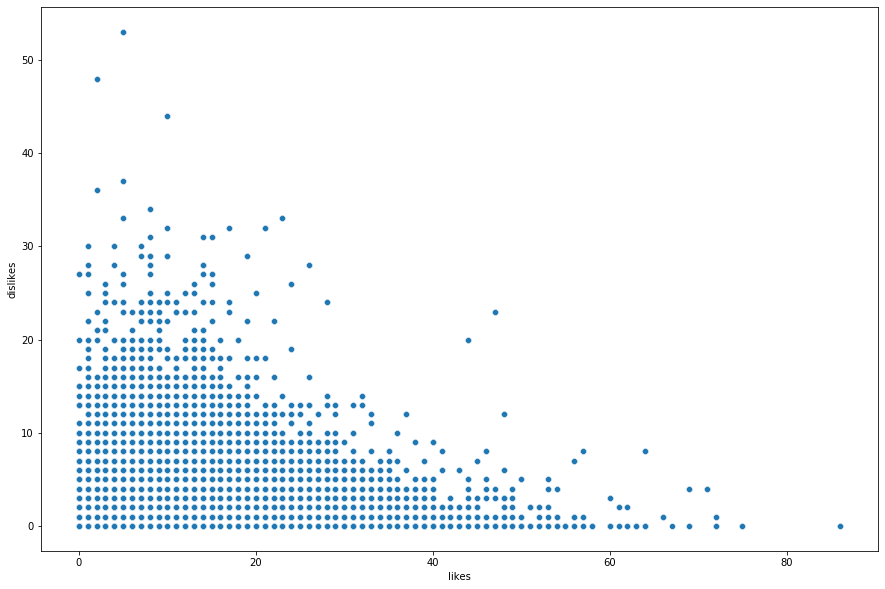

In [9]:
plt.figure(figsize = (15,10))
sns.scatterplot(data= df_comment, x='likes', y='dislikes')

3. Sub Plot (left and right)

        a. barh : Resto All Total Booking
        b. Pie Chart : Completed vs Cancelled

In [10]:
df_food = pd.read_csv(PATH_DATA+'food_delivery_datasets.csv', parse_dates = ['date_time'])

In [29]:
## barh
k = 25
series_k_resto = df_food.groupby('resto_id')['order_id'].size().sort_values(ascending = False)[:k]
resto_k = series_k_resto.index
df_food_k = df_food[df_food['resto_id'].isin(resto_k)]
series_k_status = df_food_k.groupby('status').size()

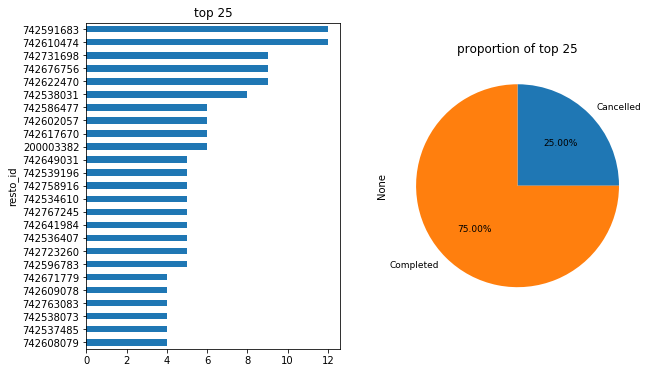

In [30]:
## Subplot
fig, axes = plt.subplots(nrows=1, ncols=2)
## barh
series_k_resto.sort_values().plot(kind = 'barh',figsize = (10,6), ax = axes[0], title = 'top '+str(k))
series_k_status.plot(kind = 'pie', autopct='%.2f%%', fontsize=9, ax = axes[1], title = 'proportion of top '+str(k))

In [31]:
## additional
## define function k
def generate_plot_best_k(k, savefig = False):
    series_k_resto = df_food.groupby('resto_id')['order_id'].size().sort_values(ascending = False)[:k]
    resto_k = series_k_resto.index
    df_food_k = df_food[df_food['resto_id'].isin(resto_k)]
    series_k_status = df_food_k.groupby('status').size()
    
    ## Subplot
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ## barh
    series_k_resto.sort_values().plot(kind = 'barh',figsize = (10,6), ax = axes[0],title = 'top '+str(k))
    fig_save = series_k_status.plot(kind = 'pie', autopct='%.2f%%', fontsize=9, ax = axes[1], title = 'proportion of top '+str(k)) 
    
    ## save figure
    if savefig :
        fig_save.get_figure().savefig(PLOT_RES+'subplots_best_'+str(k)+'.png')

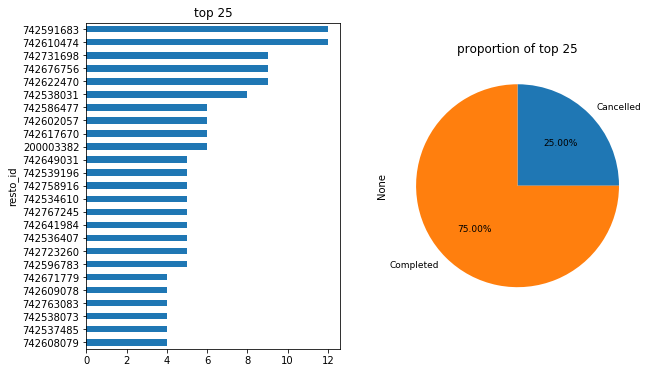

In [38]:
generate_plot_best_k(25)